In [16]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import csv
from helpers import gantt_chart

df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Resource="M2"),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Resource="M2"),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Resource="M1")
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Resource")
fig.show()

['#000080', '#7bff7b', '#800000']
[(1.904762, 0.476191), (2.380953, 0.952381), (3.809524, 0.476191)]
[(0.476191, 1.428571), (1.904762, 0.476191), (2.857143, 0.952381)]
[(0.0, 0.476191), (0.476191, 0.952381), (1.428571, 1.428571)]


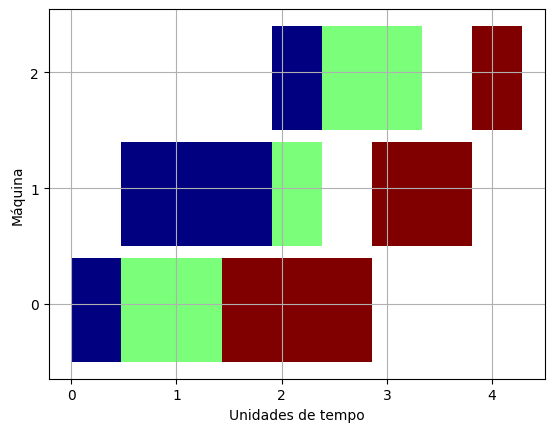

In [17]:



def get_timelines_from_file(path):
    timelines = []
    with open(path, newline='') as csv_file:
        reader = csv.reader(csv_file, delimiter=',', quotechar = '\'')
        next(reader, None)
        for row in reader:
            timeline = []
            for i in range(0, len(row), 2):
                timeline.append((float(row[i]), float(row[i+1])))
            timelines.append(timeline)

    timelines.reverse()

    return timelines


timelines = get_timelines_from_file('factory_test.csv')
ytick_labels = range(len(timelines))
yticks = range(15, len(timelines)*10 + 15, 10)
fig, gnt = plt.subplots()
gnt.set_xlabel('Unidades de tempo')
gnt.set_ylabel('Máquina')
gnt.set_yticks(yticks)
gnt.set_yticklabels(ytick_labels)
gnt.grid(True)

num_jobs = len(timelines[0])
cmap = cm.get_cmap('jet', num_jobs)
gantt_colors = [ colors.to_hex(cmap(i)) for i in range(num_jobs)]
print(gantt_colors)

for i, t in enumerate(timelines):
    gnt.broken_barh(t, (10*(len(timelines)-i), 9), facecolors =gantt_colors)
    print(t)

plt.show()


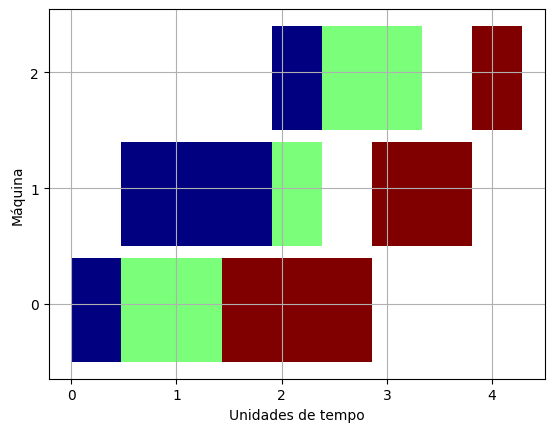

In [18]:
gantt_chart('factory_test_speed_down.csv')

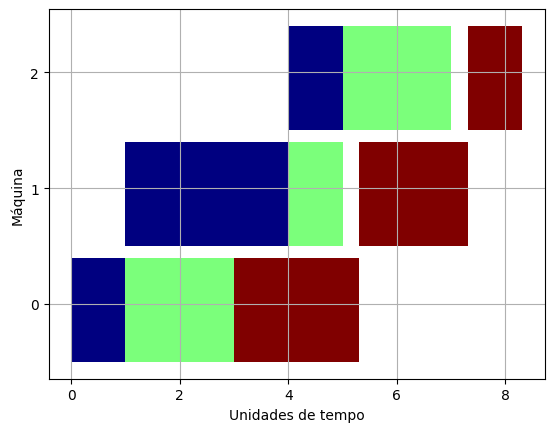

In [19]:
gantt_chart('factory_test_speed_up.csv')